<a href="https://colab.research.google.com/github/Gihozoo/Next_word_prediction/blob/main/Assignment2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Bring the data

In [ ]:
filename = '/content/drive/My Drive/Datasets/metamorphosis.txt'
file = open(filename, 'rt' )
text = file.read()
file.close()

In [ ]:
text

'One morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed into a horrible vermin.  He lay on\nhis armour-like back, and if he lifted his head a little he could\nsee his brown belly, slightly domed and divided by arches into stiff\nsections.  The bedding was hardly able to cover it and seemed ready\nto slide off any moment.  His many legs, pitifully thin compared\nwith the size of the rest of him, waved about helplessly as he\nlooked.\n\n"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\na proper human room although a little too small, lay peacefully\nbetween its four familiar walls.  A collection of textile samples\nlay spread out on the table - Samsa was a travelling salesman - and\nabove it there hung a picture that he had recently cut out of an\nillustrated magazine and housed in a nice, gilded frame.  It showed\na lady fitted out with a fur hat and fur boa who sat upright,\nraising a heavy fur muff that covered the whole

In [ ]:
#preprocess the corpus
import re
text=text.lower()
clean_text=re.sub('[^a-z0-9]+',' ', text)

# Data preparation

In [ ]:
#required libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as np
from numpy import asarray
from numpy import zeros
from keras_preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#tokenizing the text into words
tokens = word_tokenize(clean_text)
tokens[:5]

['one', 'morning', 'when', 'gregor', 'samsa']

In [ ]:
#length of the sequence to train
train_len = 6

In [ ]:
#converting the data into required sequence
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [ ]:
text_sequences[:4]

[['one', 'morning', 'when', 'gregor', 'samsa', 'woke'],
 ['morning', 'when', 'gregor', 'samsa', 'woke', 'from'],
 ['when', 'gregor', 'samsa', 'woke', 'from', 'troubled'],
 ['gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams']]

In [ ]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences[:4]

[[54, 148, 57, 12, 98, 920],
 [148, 57, 12, 98, 920, 29],
 [57, 12, 98, 920, 29, 1295],
 [12, 98, 920, 29, 1295, 921]]

In [ ]:
sequences=np.asarray(sequences)

In [ ]:
# pad documents to a max length of the maximum vector length of 1 since the elements are strings

padded_docs = pad_sequences(sequences, maxlen=6, padding= 'post' )
padded_docs

array([[  54,  148,   57,   12,   98,  920],
       [ 148,   57,   12,   98,  920,   29],
       [  57,   12,   98,  920,   29, 1295],
       ...,
       [  74,   48,    3,  918,   32,   20],
       [  48,    3,  918,   32,   20,  919],
       [   3,  918,   32,   20,  919,  135]], dtype=int32)

In [ ]:
#vocabulary size
vocabulary_size = len(tokenizer.word_counts)+1
vocabulary_size

2572

In [ ]:
#trainX
X=sequences[:,:-1]

In [ ]:
X

array([[ 54, 148,  57,  12,  98],
       [148,  57,  12,  98, 920],
       [ 57,  12,  98, 920,  29],
       ...,
       [ 74,  48,   3, 918,  32],
       [ 48,   3, 918,  32,  20],
       [  3, 918,  32,  20, 919]])

In [ ]:
#input sequence length 
seq_length=X.shape[1]
seq_length

5

In [ ]:
#trainY
y=sequences[:,-1]

In [ ]:
y

array([ 920,   29, 1295, ...,   20,  919,  135])

In [ ]:
#one hot encoding
y = to_categorical(y, num_classes=vocabulary_size)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
embeddings_index = dict()
f = open( '/content/drive/My Drive/Datasets/glove.6B.100d.txt.word2vec' )
for line in f:
  values = line.split()
  word = values[0]
  coefs = asarray(values[1:], dtype= 'float32' )
  embeddings_index[word] = coefs
f.close()
print( ' Loaded %s word vectors. ' % len(embeddings_index))

 Loaded 400001 word vectors. 


In [ ]:
# create a weight matrix for words in training dwords
embedding_matrix = zeros((vocabulary_size, 100))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(2572, 100)

# Building the model and training the model

> Indented block



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 100)            257200    
                                                                 
 bidirectional_6 (Bidirectio  (None, 5, 400)           481600    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 400)              961600    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 100)               40100     
                                                                 
 dense_7 (Dense)             (None, 2572)              259772    
                                                                 
Total params: 2,000,272
Trainable params: 1,743,072
No

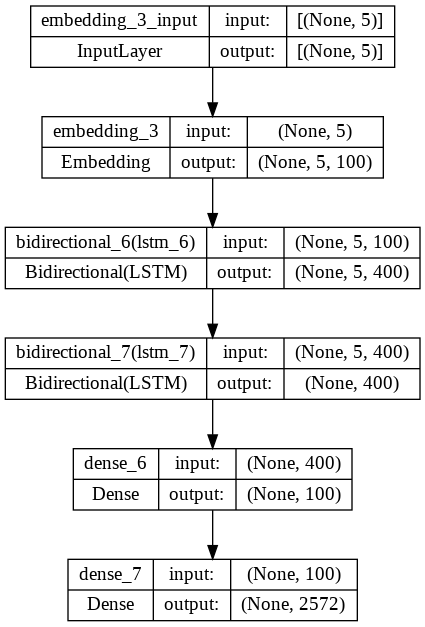

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
tf.keras.layers.Embedding(vocabulary_size, 100, weights=[embedding_matrix], input_length=5, trainable=False),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True)),
#tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
#tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(vocabulary_size , activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

In [ ]:
history = model.fit(X, y, batch_size = 32, epochs = 50, validation_data=(X_val, y_val)).history

Epoch 1/50
700/700 [==============================] - 15s 13ms/step - loss: 6.1369 - accuracy: 0.0533 - val_loss: 5.7655 - val_accuracy: 0.0788
Epoch 2/50
700/700 [==============================] - 8s 12ms/step - loss: 5.5792 - accuracy: 0.0957 - val_loss: 5.2878 - val_accuracy: 0.1108
Epoch 3/50
700/700 [==============================] - 8s 11ms/step - loss: 5.2214 - accuracy: 0.1160 - val_loss: 4.9890 - val_accuracy: 0.1220
Epoch 4/50
700/700 [==============================] - 8s 11ms/step - loss: 4.9860 - accuracy: 0.1269 - val_loss: 4.7984 - val_accuracy: 0.1311
Epoch 5/50
700/700 [==============================] - 8s 11ms/step - loss: 4.8025 - accuracy: 0.1359 - val_loss: 4.5885 - val_accuracy: 0.1416
Epoch 6/50
700/700 [==============================] - 8s 11ms/step - loss: 4.6325 - accuracy: 0.1440 - val_loss: 4.4186 - val_accuracy: 0.1507
Epoch 7/50
700/700 [==============================] - 8s 11ms/step - loss: 4.4573 - accuracy: 0.1551 - val_loss: 4.2257 - val_accuracy: 0.167

In [ ]:
import matplotlib.pyplot as plt

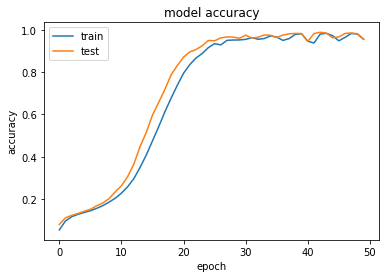

In [ ]:
# import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')



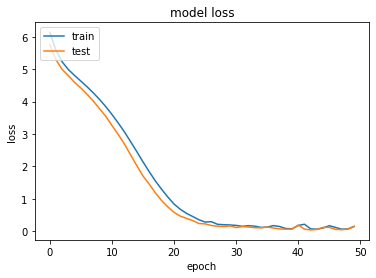

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Model perfomance and regulalization

In this model, the 96% accuracy alongside a 97% val accuracy is enough and therefore regulalization is done


## Text predictioon

In [ ]:
#Function to predict

def prediction(seed_text): 
  for _ in range(1):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=5, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=1), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += ' '+output_word
    print("predicted word:", output_word)
    print("New text:", seed_text)


In [ ]:
#@title TextBox
Text = "The students are going to" #@param {type:"string"}

# check if there 5 words otherwise don't predict

res = len(Text.split())

if res < 5 or res > 5: 
  print("Sorry your words should of length 5")


else:  
  prediction(Text)


1/1 [==============================] - 1s 1s/step
predicted word: come
New text: The students are going to come
